<h1><center>King County House Prices EDA</center></h1>

![title](images/title1.png)

Author: Christian E. Meyer

Contact: <a href="https://hofa.biz/?p=134">Link</a>

In [1]:
# Importing all required packages
import datetime
from itertools import combinations
import matplotlib.pyplot as plt
import math
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
from scipy import stats
import scipy
import seaborn as sns
import statsmodels.api as sms
import statsmodels.formula.api as smf

%matplotlib inline

<h2><center>Column Names and Descriptions for Kings County Data Set</center></h2>

| Variable | Definition | Key | Type |
| :- |:- | :- | --- |
| **id** | Unique identified for a house |  | ordinal |
| **date** | Date the house was sold | format dd/mm/YYYY | interval |
| **price** | The prediction target |  | ratio |
| **bedrooms** | Number of Bedrooms/House |  | ratio |
| **bathrooms** | Number of bathrooms/bedrooms |  | ratio |
| **sqft_living** | Square footage of the home |  | ratio |
| **sqft_lot** | Square footage of the lot |  | ratio |
| **floors** | Total floors (levels) in house |  | ratio |
| **waterfront** | House which has a view to a waterfront | 0 (no waterfront) - 1 (waterfront)*  | dichotomous |
| **view** | Has been viewed | From 0 (no view) - 4 (Excellent)* | ordinal |
| **condition** | How good the condition is ( Overall ) | From 1 (poor) - 5 (very good)*<br />Relative to age and grade. | ordinal |
| **grade** | Overall grade given to the housing unit, based on King County grading system | From 4 - 13*<br />Buildings of better quality  = higher grade | ordinal|
| **sqft_above** | Square footage of house apart from basement |  | ratio |
| **sqft_basement** | Square footage of the basement |  | ratio |
| **yr_built** | Built Year |  | interval |
| **yr_renovated** | Year when house was renovated |  | interval |
| **zipcode** | zip |  | nominal |
| **lat** | Latitude coordinate |  | interval |
| **long** | Longitude coordinate |  | interval |
| **sqft_living15** | The square footage of interior housing living space for the nearest 15 neighbors |  | ratio |
| **sqft_lot15** | The square footage of the land lots of the nearest 15 neighbors |  | ratio |

\* source: https://info.kingcounty.gov/assessor/esales/Glossary.aspx

In [2]:
house = pd.read_csv('King_County_House_prices_dataset.csv', sep=",")
print(house.shape) 
house.head()

(21597, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [4]:
house.nunique()

id               21420
date               372
price             3622
bedrooms            12
bathrooms           29
sqft_living       1034
sqft_lot          9776
floors               6
waterfront           2
view                 5
condition            5
grade               11
sqft_above         942
sqft_basement      304
yr_built           116
yr_renovated        70
zipcode             70
lat               5033
long               751
sqft_living15      777
sqft_lot15        8682
dtype: int64

In [5]:
# Entries with x.5 floors
print("Entries with x.5 floors:\t\t\t\t\t\t",
      str(house.query("floors != 1.0 and floors != 2.0 and floors != 3.0 and floors != 4.0").floors.count()))

# Entries with x.25, x.5 or x.75 bathrooms
print("Entries with x.25, x.5 or x.75 bathrooms:\t\t\t\t",
      str(house.query("bathrooms != 1.0 and bathrooms != 2.0 and bathrooms != 3.0 and bathrooms != 4.0 and bathrooms != 5.0 and bathrooms != 6.0 and bathrooms != 8.0").bathrooms.count()))

# Create Variable sqft_diff to list entries with smaller lot square footage than living square footage
house["sqft_diff"] = house.sqft_lot - house.sqft_living
print("Entries with smaller lot square footage than living square footage:\t",
      str(house.query("sqft_diff < 0 and floors < 2").sqft_diff.count()))

# Entries with ? value in sqft_basement
print("Entries with ? value in sqft_basement:\t\t\t\t\t",
      str(house.query("sqft_basement == '?'").sqft_basement.count()))

Entries with x.5 floors:						 2078
Entries with x.25, x.5 or x.75 bathrooms:				 14898
Entries with smaller lot square footage than living square footage:	 11
Entries with ? value in sqft_basement:					 454


In [6]:
house['sqft_basement'].apply(type).value_counts()

<class 'str'>    21597
Name: sqft_basement, dtype: int64

<h2><center>Cleaning the Data Set</center></h2>

| Variable | Challenge | Action
| :- |:- | :- |
| **id** | 177 duplicates | Using separate index column as unique identifier |  
| **price** | Float number every entry ending with .0 | Set to integer
| **bathrooms** | Float number for bathroom<br />14898 entries != x.0 | No action taken
| **sqft_living** | 11 entries with larger square foot of living than square foot of the lot | No action taken
| **floors** | 2.078 entries with x.5 floors | No action taken
| **waterfront** | 2.376 items missing Float<br />Float number every entry ending with .0 | Set all 2.376 to 0 and set to integer
| **view** | 63 items missing<br />Float number every entry ending with .0 | Set missing 63 to 0 set to integer
| **sqft_basement** | 454 entries with "?"<br />Float number every entry ending with .0 are identified as string | Set all 454 to 0 and set all entries to integer
| **yr_renovated** | 3.842 items missing and 17.011 with value 0.0<br />Float number every entry ending with 0.0 | Set missing valuesto 0<br />Set to integer

In [7]:
# Set missing values to 0 for waterfront
house["waterfront"].fillna(0, inplace = True)

# Set missing values to 0 for view
house["view"].fillna(0, inplace = True)

# Set ? to 0 for sqft_basement
house["sqft_basement"].replace('?', 0, inplace = True)

# Set entries with value 0 for yr_renovated to NaN
house["yr_renovated"].fillna(0, inplace = True)

# Create copy  of  yr_renovated with 0  instead of NaN
house["yr_renovated_NaN"] = house["yr_renovated"].replace(0,np.nan) 

house.query("sqft_basement == '?' or yr_renovated == 'NaN' or waterfront == 'NaN' or view == 'NaN'") 

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_diff,yr_renovated_NaN


In [8]:
# Show type for sqft_basement entries
house["sqft_basement"].apply(type).value_counts()

<class 'str'>    21143
<class 'int'>      454
Name: sqft_basement, dtype: int64

In [9]:
# 0.0 can't be convered directly to integer, so first converting to float
house["sqft_basement"] = house["sqft_basement"].astype(float)

# Change float to integer
for column in ["price", "waterfront", "view", "sqft_basement", "yr_renovated"]:
    house[column] = house[column].astype("int64")
    
# Create variable yr house was sold based on year from variable date
house["yr"] = pd.DatetimeIndex(house["date"]).year

# Create variable yr house was sold based on year from variable date
house["quarter"] = pd.DatetimeIndex(house["date"]).quarter

# Create variable yr house was sold based on year from variable date
house["yr_quarter"] = house["yr"].astype(str) + "_"  + house["quarter"].astype(str)

# Create variable logarithm of the price
house['log_price'] = [math.log(float(p)) for p in house.price]

# Create variable yr house was sold based on year from variable date
house["yr_owned"] = house["yr"]  - house["yr_built"]

# Create location variable
house["location"] = house["lat"] * house["long"]
# Check for duplicated rows
house[house.duplicated()]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_living15,sqft_lot15,sqft_diff,yr_renovated_NaN,yr,quarter,yr_quarter,log_price,yr_owned,location


In [10]:
house.yr_quarter.unique()

array(['2014_4', '2015_1', '2014_2', '2015_2', '2014_3'], dtype=object)

<h2><center>Additional Variables</center></h2>

| Variable | Definition | Key | Type |
| :- |:- | :- | --- |
| **yr** | Year the house was sold | YYYY | interval |
| **quarter** | Quarter the house was sold | YYYY | ratio |
| **yr_quarter** | Year & Quarter the house was sold | 2014-2 - 2015-2 | ratio |
| **location** | Latitude * longitude | | interval |
| **sqft_diff** | Difference between sq living and lot | | ratio |
| **log_price** | logarithm of price | | ratio |
| **yr_owned** | Difference between year build and sold | | ratio |
| **yr_renovated_NaN** | Copy of yr_renovated but NaN instead of 0 | | ratio |

In [11]:
# Group variables by type
nominal   = ["waterfront", "zipcode"]
ordinal   = ["id", "view", "condition", "grade"]
interval  = ["yr", "quarter", "yr_quarter", "date", "yr_built", "yr_renovated", "yr_renovated_NaN", "lat", "long", "location", "yr_owned"]
ratio     = ["price", "log_price", "bedrooms", "bathrooms", "sqft_living", "sqft_lot", "floors", 
             "sqft_above", "sqft_basement", "sqft_living15", "sqft_lot15", "sqft_diff"]

<h2><center>Spreading measure</center></h2>

In [28]:
statistics = pd.DataFrame(columns = ["method", "mean", "median", "mode", "min", "range", "max", "MAD", "variance", "SD", "CV"])
statistics["method"] = ratio
for idx, column in enumerate(ratio):
    statistics.loc[idx, "mean"] = house[column].mean()
    statistics.loc[idx, "median"] = house[column].median()
    statistics.loc[idx, "mode"] = house[column].mode()[0]    
    statistics.loc[idx, "min"] = house[column].min()
    statistics.loc[idx, "range"] = house[column].max() - house[column].min()
    statistics.loc[idx, "max"] = house[column].max()
    statistics.loc[idx, "MAD"] = house[column].mad()
    statistics.loc[idx, "variance"] = house[column].var()
    statistics.loc[idx, "SD"] = house[column].std()
    statistics.loc[idx, "CV"] = house[column].std() / house[column].mean()  
statistics

,method,mean,median,mode,min,range,max,MAD,variance,SD,CV
0,price,540297,450000,350000,78000,7622000,7700000,234028,1.34959e+11,367368,0.679938
1,log_price,13.0482,13.017,12.7657,11.2645,4.59227,15.8567,0.41362,0.27726,0.526555,0.0403546
2,bedrooms,3.3732,3,3,1,32,33,0.733574,0.85803,0.926299,0.274605
3,bathrooms,2.11583,2.25,2.5,0.5,7.5,8,0.614597,0.591337,0.768984,0.363444
4,sqft_living,2080.32,1910,1300,370,13170,13540,698.085,842919,918.106,0.441329
5,sqft_lot,15099.4,7618,5000,520,1650839,1651359,13825.4,1.71501e+09,41412.6,2.74267
6,floors,1.4941,1.5,1,1,2.5,3.5,0.488354,0.291258,0.539683,0.36121
7,sqft_above,1788.6,1560,1300,370,9040,9410,640.191,685186,827.76,0.462798
8,sqft_basement,285.717,0,0,0,4820,4820,359.813,193441,439.82,1.53936
9,sqft_living15,1986.62,1840,1540,399,5811,6210,536.157,469541,685.23,0.344923


<h2><center>Histograms</center></h2>


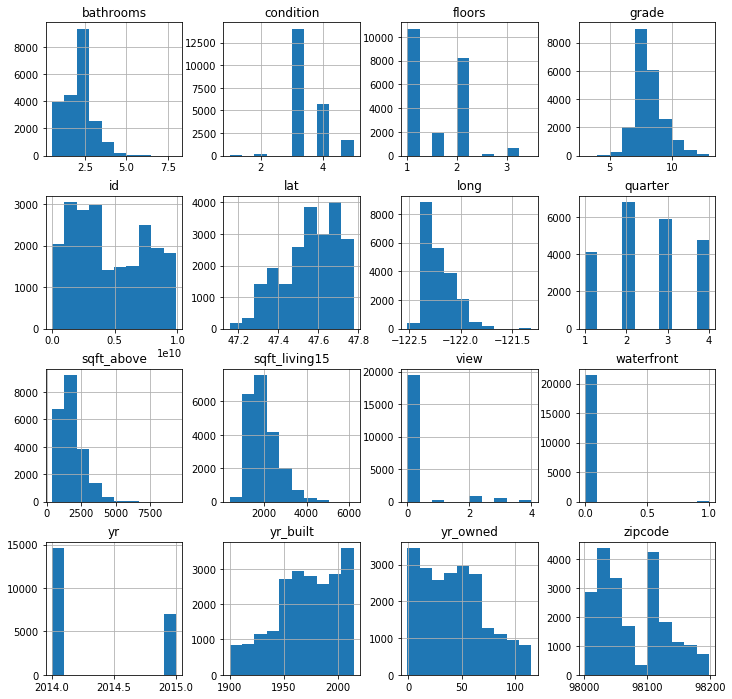

In [13]:
list1 = nominal + ordinal + interval + ["bathrooms",  "floors", "sqft_above",  "sqft_living15"]
list1.remove("date")
list1.remove("location")
list1.remove("yr_renovated")
list1.remove("yr_quarter")
list1.remove("yr_renovated_NaN")
X_dum=pd.get_dummies(house[list1].copy())
mask = np.triu(X_dum.corr())
_ = X_dum.hist(figsize=(12,12))
plt.savefig('figures/hist_1.png')

Due to outliers in the following variables the histograms will not provide useful informations.

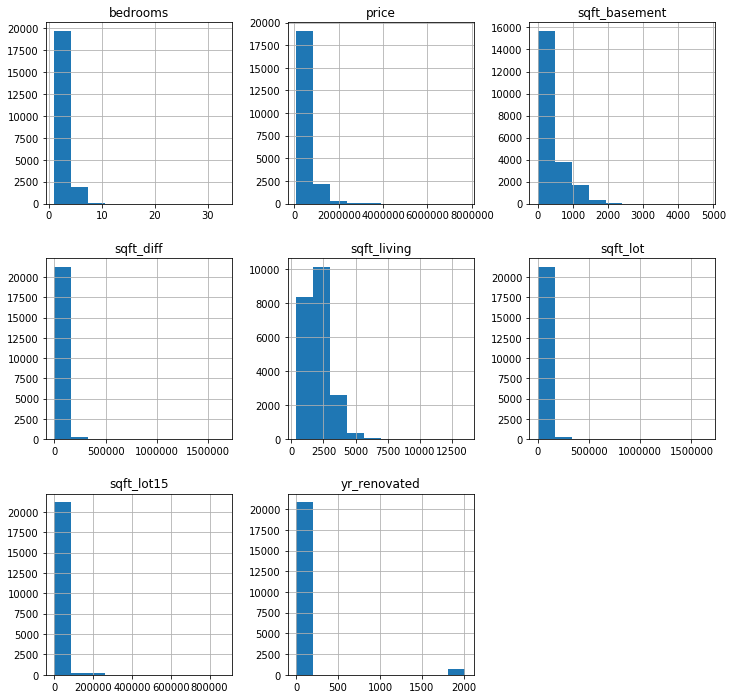

In [14]:
list2 = ["bedrooms", "price", "sqft_basement", "sqft_diff", "sqft_living", "sqft_lot", "sqft_lot15", "yr_renovated"]
X_dum = pd.get_dummies(house[list2].copy())
mask = np.triu(X_dum.corr())
_ = X_dum.hist(figsize=(12,12))
plt.savefig('figures/hist_2.png')

By setting limits manually it is possible to create useful histograms.

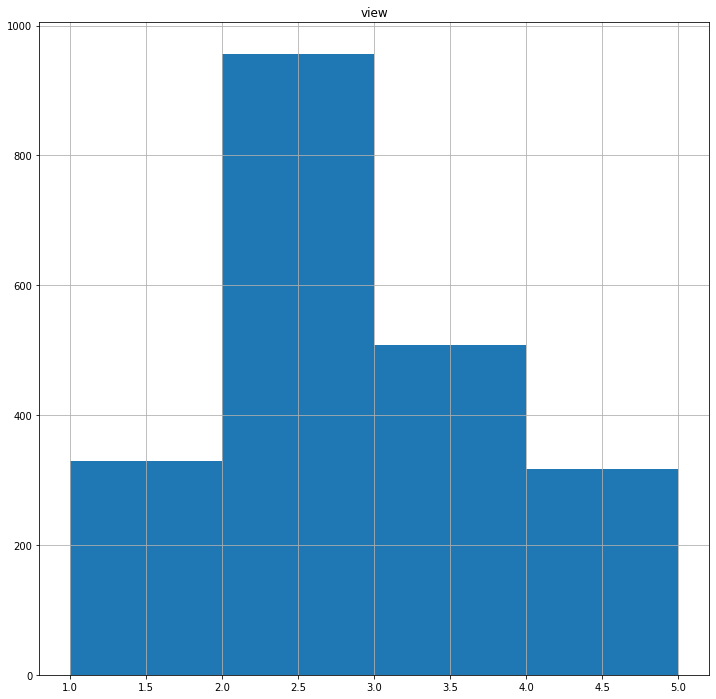

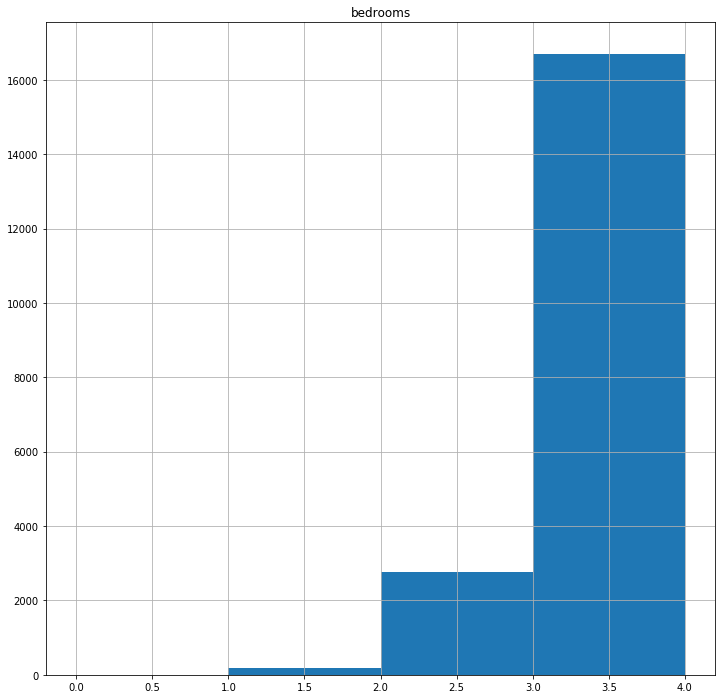

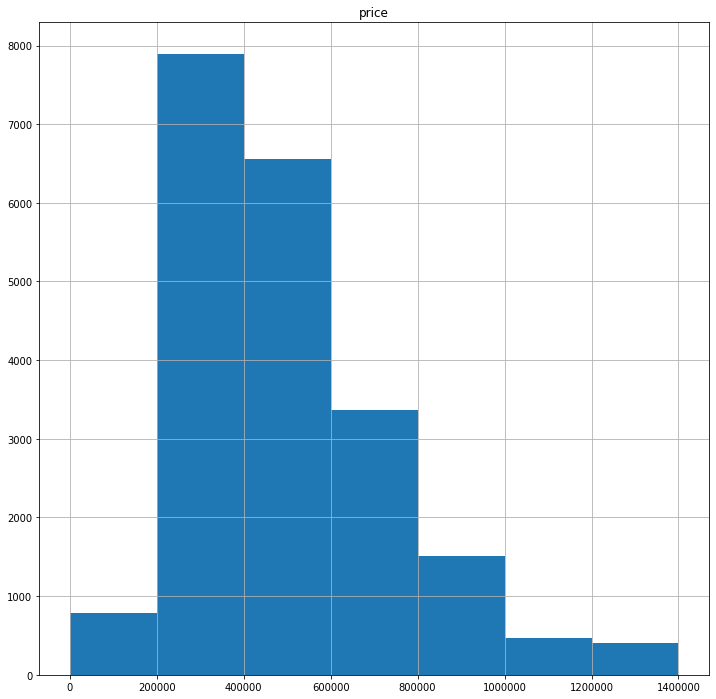

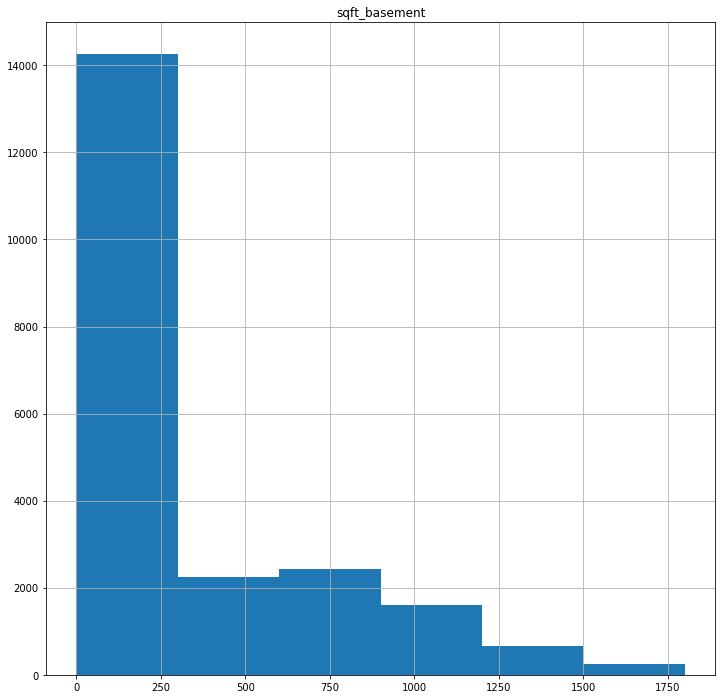

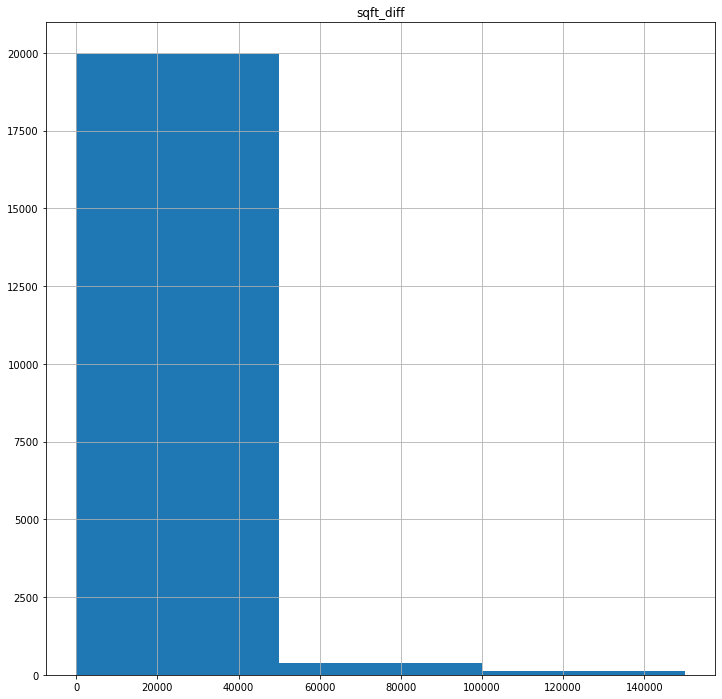

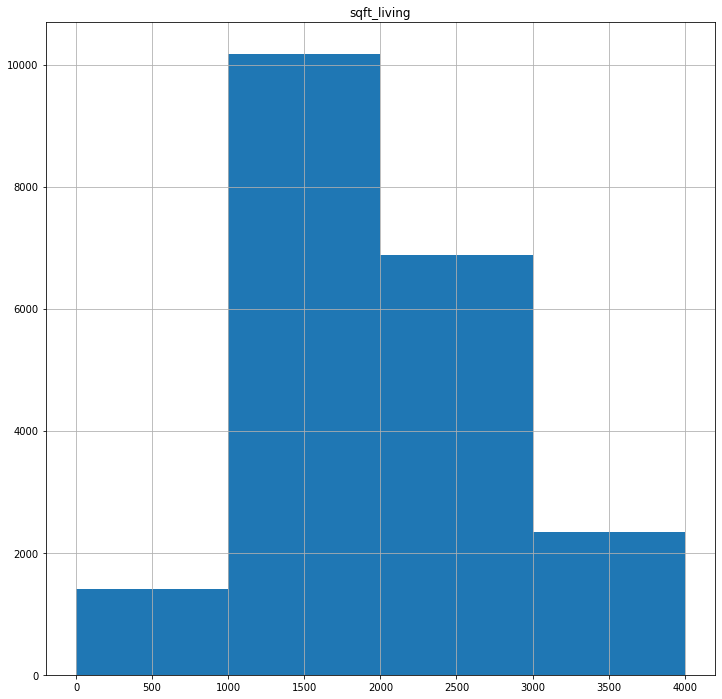

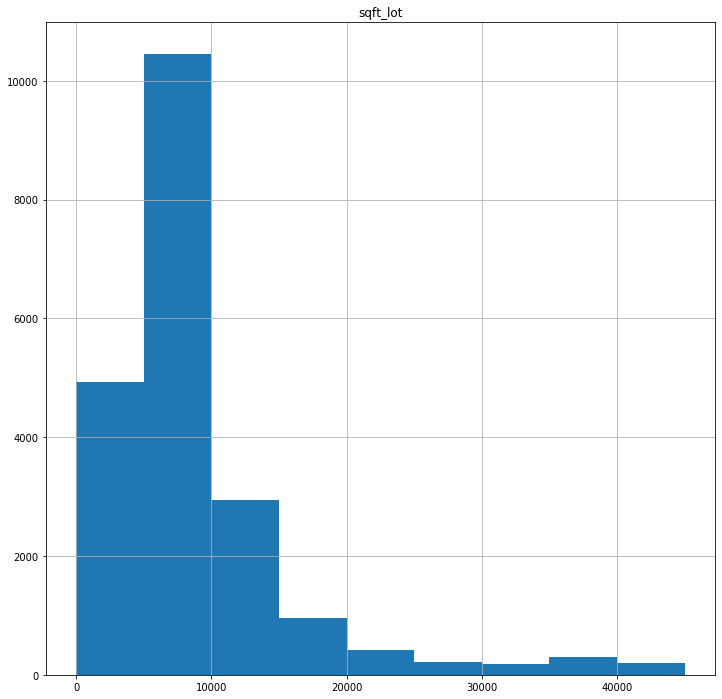

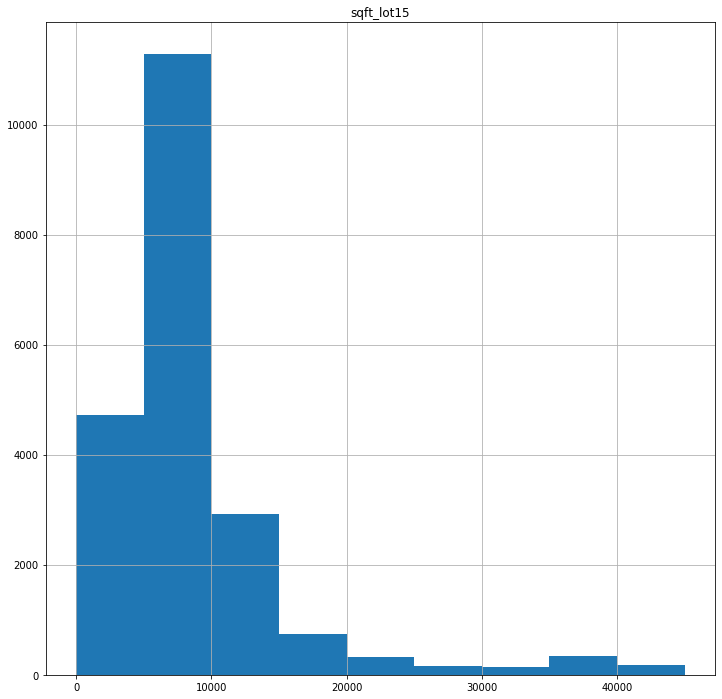

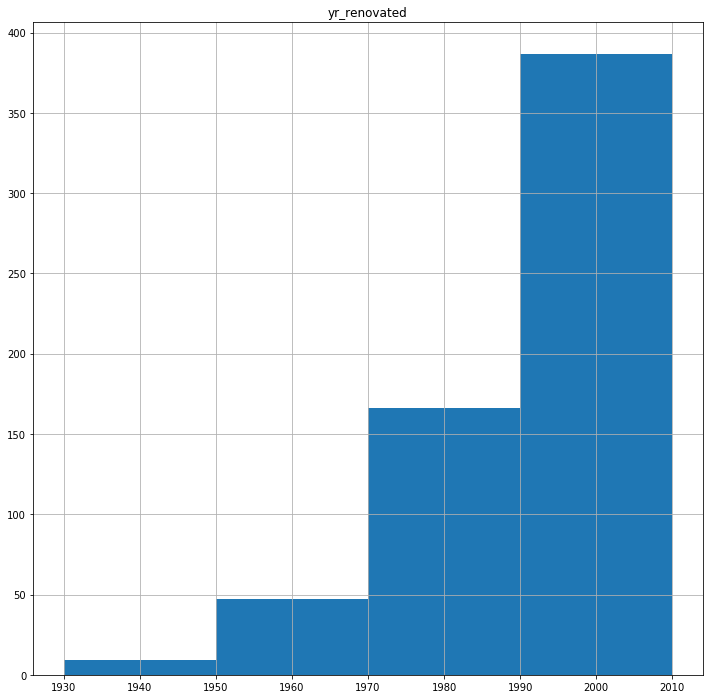

In [17]:
X_dum=pd.get_dummies(house[["view"]].copy())
mask = np.triu(X_dum.corr())
_ = X_dum.hist(bins=range(1,6),figsize=(12,12))
plt.savefig('figures/hist_3.png')

X_dum=pd.get_dummies(house[["bedrooms"]].copy())
mask = np.triu(X_dum.corr())
_ = X_dum.hist(bins=range(0,5) ,figsize=(12,12))
plt.savefig('figures/hist_4.png')

X_dum=pd.get_dummies(house[["price"]].copy())
mask = np.triu(X_dum.corr())
_ = X_dum.hist(bins=range(0,1_500_000,200_000) ,figsize=(12,12))
plt.savefig('figures/hist_5.png')

X_dum=pd.get_dummies(house[["sqft_basement"]].copy())
mask = np.triu(X_dum.corr())
_ = X_dum.hist(bins=range(0,2100,300) ,figsize=(12,12))
plt.savefig('figures/hist_6.png')

X_dum=pd.get_dummies(house[["sqft_diff"]].copy())
mask = np.triu(X_dum.corr())
_ = X_dum.hist(bins=range(0,200_000,50_000) ,figsize=(12,12))
plt.savefig('figures/hist_7.png')

X_dum=pd.get_dummies(house[["sqft_living"]].copy())
mask = np.triu(X_dum.corr())
_ = X_dum.hist(bins=range(0,5000,1000) ,figsize=(12,12))
plt.savefig('figures/hist_8.png')

X_dum=pd.get_dummies(house[["sqft_lot"]].copy())
mask = np.triu(X_dum.corr())
_ = X_dum.hist(bins=range(0,50_000,5_000) ,figsize=(12,12))
plt.savefig('figures/hist_9.png')

X_dum=pd.get_dummies(house[["sqft_lot15"]].copy())
mask = np.triu(X_dum.corr())
_ = X_dum.hist(bins=range(0,50_000,5_000) ,figsize=(12,12))
plt.savefig('figures/hist_10.png')

X_dum=pd.get_dummies(house[["yr_renovated"]].copy())
mask = np.triu(X_dum.corr())
_ = X_dum.hist(bins=range(1930,2016,20) ,figsize=(12,12))
plt.savefig('figures/hist_11.png')

Adjust the bins to receive helpful information about the distribution of the majority.

<h2><center>Correlation analyis</center></h2>
<center>$r_{x,y} = \frac{\Sigma_{i=1}^{n}(x_i-\bar{x})(y_i-\bar{y})}{\sqrt{\Sigma_{i=1}^{n}(x_i-\bar{x})^2}\sqrt{\Sigma_{i=1}^{n}(y_i-\bar{y})^2}}=\frac{Cov(x,y)}{Std(x)\times Std(y)}$</center>


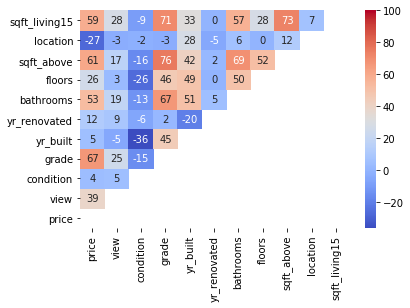

In [29]:
X_dum=pd.get_dummies(house[["price", "view", "condition", "grade",
                            "yr_built", "yr_renovated", "bathrooms", "floors", 
                            "sqft_above", "location",  "sqft_living15"]].copy())
mask = np.triu(X_dum.corr())
ax = sns.heatmap(round(X_dum.corr()*100,0)
                 ,annot=True
                 ,mask=mask
                 ,cmap='coolwarm')
ax.set_ylim((0,11))
plt.savefig('figures/correlogram.png')

<h2><center>Grouping the data</center></h2>

In [89]:
# Grouped price by amount of floors
round(house.groupby('floors').price.describe().unstack(()),2)
# Houses with 2,5 floors are much more expensive than with 2 or 3 floors

,count,mean,std,min,25%,50%,75%,max
floors,,,,,,,,
1.0,10673.0,442358.43,264168.41,78000.0,275500.0,390000.0,530000.0,4670000.0
1.5,1910.0,559044.93,303722.10,92000.0,355000.0,524475.0,687875.0,3650000.0
2.0,8235.0,649185.64,434236.60,90000.0,379000.0,543000.0,772500.0,7060000.0
2.5,161.0,1061020.90,858836.03,255000.0,550000.0,799200.0,1300000.0,7700000.0
3.0,611.0,583433.90,338743.39,205000.0,385000.0,491000.0,633250.0,3100000.0
3.5,7.0,910214.29,1054668.50,435000.0,502000.0,525000.0,553750.0,3300000.0


In [90]:
# Grouped grade by amount of floors
round(house.groupby('floors').grade.describe().unstack(()),2)
# Houses with 1 - 2 floors are much likley to be graded

,count,mean,std,min,25%,50%,75%,max
floors,,,,,,,,
1.0,10673.0,7.15,0.90,3.0,7.0,7.0,8.0,13.0
1.5,1910.0,7.19,0.95,4.0,7.0,7.0,8.0,11.0
2.0,8235.0,8.36,1.15,5.0,8.0,8.0,9.0,13.0
2.5,161.0,8.89,1.32,6.0,8.0,9.0,10.0,13.0
3.0,611.0,8.16,0.89,7.0,8.0,8.0,8.0,12.0
3.5,7.0,8.57,1.51,8.0,8.0,8.0,8.0,12.0


In [92]:
# Grouped price by amount of grade
round(house.groupby('grade').price.describe().unstack(()),2)
# House grade 3 can be ignored

,count,mean,std,min,25%,50%,75%,max
grade,,,,,,,,
3,1.0,262000.00,NaN,262000.0,262000.0,262000.0,262000.0,262000.0
4,27.0,212001.85,97294.50,80000.0,142500.0,200000.0,273500.0,435000.0
5,242.0,248523.97,118100.28,78000.0,175000.0,228700.0,295750.0,795000.0
6,2038.0,301916.57,122952.25,82000.0,215037.5,275276.5,366837.5,1200000.0
7,8974.0,402594.57,155728.55,90000.0,285000.0,375000.0,485000.0,2050000.0
8,6065.0,542986.80,217627.96,140000.0,390000.0,510000.0,640000.0,3070000.0
9,2615.0,773738.22,316522.12,230000.0,571500.0,720000.0,880000.0,2700000.0
10,1134.0,1072347.47,484050.81,316000.0,768087.5,914327.0,1250000.0,3600000.0
11,399.0,1497792.38,705127.36,420000.0,1040000.0,1280000.0,1700000.0,7060000.0


In [103]:
print(212002/4, 248524/5, 301917/6, 402595/7, 542987/8, 773738/9, 1072347/10, 1497792/11, 2202528/12, 3710769/13)

53000.5 49704.8 50319.5 57513.57142857143 67873.375 85970.88888888889 107234.7 136162.9090909091 183544.0 285443.76923076925


In [104]:
# Grouped bedrooms by grade
round(house.groupby('bedrooms').grade.describe().unstack(()),2)
# Amount of bedrooms as a small impact on the grading

,count,mean,std,min,25%,50%,75%,max
bedrooms,,,,,,,,
1,196.0,6.13,1.09,3.0,5.0,6.0,7.00,10.0
2,2760.0,6.87,0.94,4.0,6.0,7.0,7.00,12.0
3,9824.0,7.47,0.95,4.0,7.0,7.0,8.00,13.0
4,6882.0,8.12,1.21,5.0,7.0,8.0,9.00,13.0
5,1601.0,8.27,1.34,5.0,7.0,8.0,9.00,13.0
6,272.0,8.08,1.37,5.0,7.0,8.0,9.00,13.0
7,38.0,8.45,1.50,6.0,7.0,8.0,9.75,12.0
8,13.0,8.08,1.50,7.0,7.0,8.0,8.00,12.0
9,6.0,7.83,1.60,7.0,7.0,7.0,7.75,11.0


In [105]:
# Grouped bathrooms by grade
round(house.groupby('bathrooms').grade.describe().unstack(()),2)
# Amount of bathrooms as a impact on the grading

,count,mean,std,min,25%,50%,75%,max
bathrooms,,,,,,,,
0.50,4.0,6.25,1.26,5.0,5.75,6.0,6.50,8.0
0.75,71.0,5.63,1.09,3.0,5.00,6.0,6.00,7.0
1.00,3851.0,6.56,0.67,4.0,6.00,7.0,7.00,9.0
1.25,9.0,8.00,1.50,6.0,7.00,8.0,9.00,11.0
1.50,1445.0,7.13,0.63,5.0,7.00,7.0,7.00,11.0
1.75,3048.0,7.26,0.67,4.0,7.00,7.0,8.00,11.0
2.00,1930.0,7.24,0.75,5.0,7.00,7.0,8.00,10.0
2.25,2047.0,7.81,0.79,6.0,7.00,8.0,8.00,11.0
2.50,5377.0,8.15,0.95,5.0,7.00,8.0,9.00,13.0


In [106]:
# Grouped bathrooms by grade
round(house.groupby('condition').price.describe().unstack(()),2)
# Condition seem to have a smaller impact on the price than the grade, 
# high std indicate that the condition rating is not the best measurement

,count,mean,std,min,25%,50%,75%,max
condition,,,,,,,,
1,29.0,341067.24,273482.77,78000.0,190000.0,270000.0,432500.0,1500000.0
2,170.0,328178.76,246987.01,80000.0,189250.0,279000.0,399100.0,2560000.0
3,14020.0,542173.06,364650.10,82000.0,329875.0,450250.0,640000.0,7060000.0
4,5677.0,521374.45,358795.96,89000.0,305000.0,440000.0,625000.0,7700000.0
5,1701.0,612577.74,411317.86,110000.0,350000.0,526000.0,725000.0,3650000.0


In [107]:
# Grouped price by view
round(house.groupby('view').price.describe().unstack(()),2)
# Houses without a view are much less expensive

,count,mean,std,min,25%,50%,75%,max
view,,,,,,,,
0,19485.0,497210.71,289601.48,78000.0,311600.0,433000.0,600000.0,5570000.0
1,330.0,813373.27,512776.63,217000.0,498250.0,691944.0,923750.0,3650000.0
2,957.0,791390.37,510385.69,169317.0,485000.0,675000.0,938000.0,7060000.0
3,508.0,973285.20,613898.40,154000.0,558000.0,802500.0,1260000.0,7700000.0
4,317.0,1452465.88,930747.70,252000.0,815000.0,1180000.0,1850000.0,6890000.0


In [110]:
# Grouped price by waterfront
round(house.groupby('waterfront').price.describe().unstack(()),2)
# A waterfront seem to triple the price

,count,mean,std,min,25%,50%,75%,max
waterfront,,,,,,,,
0,21451.0,532286.22,342808.19,78000.0,320000.0,450000.0,640000.0,7700000.0
1,146.0,1717214.73,1145384.86,285000.0,827500.0,1510000.0,2282500.0,7060000.0


<h2><center>Linear Regression</center></h2>

In [36]:
lst = nominal + ordinal + interval + ratio
lst.remove("price")
lst.remove("log_price")
best_rsquared = [[], 0]
best_rsquared_adj  = [[], 0]
for size in range(1,5):
    for combo in combinations(lst, size):  # size  2 for pairs, size 3 for triples, etc
        entries  = ' + '.join(combo) 
        tmp = smf.ols(formula=f'log_price ~ {entries}', data=house).fit()
        if tmp.rsquared > best_rsquared[1]:          best_rsquared = combo, tmp.rsquared
        if tmp.rsquared_adj > best_rsquared_adj[1]:  best_rsquared_adj = combo, tmp.rsquared_adj
print(f"Best rquarded varaible: {best_rsquared}")
print(f"Best adj. rquarded varaible: {best_rsquared_adj}")

Best rquarded varaible: (('grade', 'date', 'yr_renovated_NaN', 'sqft_living'), 0.8033421813847895)
Best adj. rquarded varaible: (('grade', 'yr_renovated_NaN', 'location', 'sqft_living'), 0.7377293296502359)


<h2><center>Results of (multiple) linear regression</center></h2>

| n | Statistical measure | Variable(s) | Value |
| :- | :- |:- | :- |
| Single | Best rquarded | Grade | 0.495 |
| | Best adj. rquarded | Grade | 0.495 |
| | | |
| Pairs | Best rquarded | lat, sqft_living | 0.654 |
| | Best adj. rquarded | lat, sqft_living | 0.654 |
| | | |
| Triples | Best rquarded | grade, date, yr_renovated_NaN | 0.774 |
| | Best adj. rquarded | grade, location, sqft_living | 0.704 |
| | | |
| Quads | Best rquarded | grade, date, yr_renovated_NaN, sqft_living) | 0.803 |
| | Best adj. rquarded | grade, yr_renovated_NaN, location, sqft_living | 0.738 |

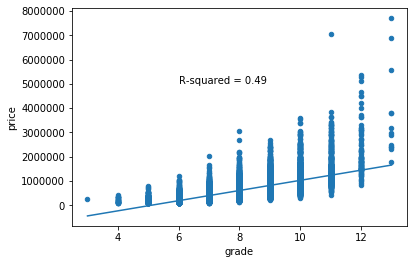

In [43]:
fig = house.plot(x='grade', 
                y='price', 
                kind='scatter')
r_squared = 0.495
plt.plot(np.unique(house.grade), np.poly1d(np.polyfit(house.grade, house.price, 1))(np.unique(house.grade)))
plt.text(6, 5_000_000, 'R-squared = %0.2f' % r_squared)
plt.show()

In [48]:
# Create an OLS model for a single item
X = house.grade
y = house.price
model = sms.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.764
Model:                            OLS   Adj. R-squared (uncentered):              0.764
Method:                 Least Squares   F-statistic:                          7.006e+04
Date:                Wed, 10 Jun 2020   Prob (F-statistic):                        0.00
Time:                        11:11:09   Log-Likelihood:                     -3.0422e+05
No. Observations:               21597   AIC:                                  6.084e+05
Df Residuals:                   21596   BIC:                                  6.084e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
grade       7.373e+04    278.558    264.693      0.000    7.32e+04    7.43e+04
==============================================================================
Omnibus:                    21420.678   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2051737.740
Skew:                           4.683   Prob(JB):                         0.00
Kurtosis:                      49.822   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
#smf.ols(formula="price ~ sqft_living", data=house).fit().summary()
#(Adj.) R-squared: 	0.493
X = house.sqft_living
y = house.price
model = sms.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.839
Model:                            OLS   Adj. R-squared (uncentered):              0.839
Method:                 Least Squares   F-statistic:                          1.124e+05
Date:                Wed, 10 Jun 2020   Prob (F-statistic):                        0.00
Time:                        11:15:43   Log-Likelihood:                     -3.0011e+05
No. Observations:               21597   AIC:                                  6.002e+05
Df Residuals:                   21596   BIC:                                  6.002e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
sqft_living   263.1647      0.785    335.319      0.000     261.626     264.703
==============================================================================
Omnibus:                    16021.993   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           689028.909
Skew:                           3.128   Prob(JB):                         0.00
Kurtosis:                      29.955   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
# Different approach leads to different results for (Adj.) R-squared for grade
smf.ols(formula="price ~ grade", data=house).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.446
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                 1.740e+04
Date:                Wed, 10 Jun 2020   Prob (F-statistic):               0.00
Time:                        11:10:51   Log-Likelihood:            -3.0101e+05
No. Observations:               21597   AIC:                         6.020e+05
Df Residuals:                   21595   BIC:                         6.020e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.061e+06   1.23e+04    -86.396      0.000   -1.09e+06   -1.04e+06
grade       2.092e+05   1585.790    131.895      0.000    2.06e+05    2.12e+05
==============================================================================
Omnibus:                    19879.964   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2043898.709
Skew:                           4.081   Prob(JB):                         0.00
Kurtosis:                      49.954   Cond. No.                         52.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
# Summary for quad grade + yr_renovated_NaN + location + sqft_living
smf.ols(formula='price ~ grade + yr_renovated_NaN + location + sqft_living', data=house).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     421.1
Date:                Wed, 10 Jun 2020   Prob (F-statistic):          6.95e-189
Time:                        11:11:45   Log-Likelihood:                -10545.
No. Observations:                 744   AIC:                         2.110e+04
Df Residuals:                     739   BIC:                         2.112e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -1.893e+07   4.62e+06     -4.094      0.000    -2.8e+07   -9.85e+06
grade             1.451e+05    1.6e+04      9.051      0.000    1.14e+05    1.77e+05
yr_renovated_NaN -1025.7750    843.417     -1.216      0.224   -2681.554     630.004
location         -3406.7286    743.938     -4.579      0.000   -4867.211   -1946.246
sqft_living        343.3437     16.991     20.208      0.000     309.988     376.700
==============================================================================
Omnibus:                      414.808   Durbin-Watson:                   1.939
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8318.414
Skew:                           2.069   Prob(JB):                         0.00
Kurtosis:                      18.850   Cond. No.                     2.39e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.39e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<h2><center>Location impact on the price</center></h2>

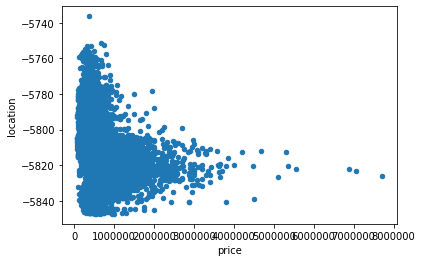

In [113]:
house.plot('price', 'location', kind='scatter');